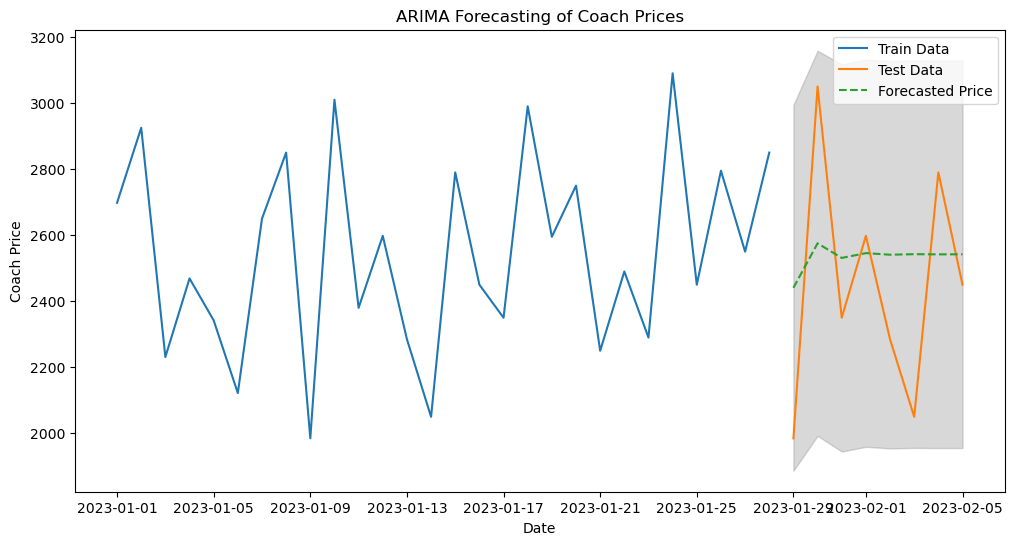

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Sample data (replace this with your actual data)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=36, freq='D'),
    'coach_price': [2698, 2925, 2231, 2469, 2342, 2122, 2650, 2850, 1985, 3010,
                    2380, 2598, 2285, 2050, 2790, 2450, 2350, 2990, 2595, 2750,
                    2250, 2490, 2290, 3090, 2450, 2795, 2550, 2850, 1985, 3050,
                    2350, 2598, 2285, 2050, 2790, 2450]
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime type (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

# Train-Test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA model fitting and forecasting
model = auto_arima(train['coach_price'], seasonal=False, stepwise=True, suppress_warnings=True)
model.fit(train['coach_price'])
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Convert the forecasted values to a DataFrame with proper date index
forecast_index = pd.date_range(start=test.index[0], periods=len(forecast), freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_Price'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['coach_price'], label='Train Data')
plt.plot(test['coach_price'], label='Test Data')
plt.plot(forecast_df['Forecasted_Price'], label='Forecasted Price', linestyle='dashed')
plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Coach Price')
plt.title('ARIMA Forecasting of Coach Prices')
plt.legend()
plt.show()
